
Magic Gamma Telescope Reading

In [1]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

Read dataset into Python

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ml_IA/magic_gamma_telescope04.csv')

In [8]:
df.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [10]:
df.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [ ]:
df.info()

No null values or type problems

In [11]:
x = df.drop('class',axis=1).values
y = df['class'].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

SCaling

In [13]:
scale = MinMaxScaler()

In [14]:
train_fit = scale.fit(x_train)

In [15]:
x_train = train_fit.transform(x_train)
x_test = train_fit.transform(x_test)

Label Encoding

In [16]:
LE = LabelEncoder()

In [17]:
y_en = LE.fit_transform(y)
y_train_en = LE.fit_transform(y_train)
y_test_en = LE.fit_transform(y_test)

In [18]:
x_train.shape,x_test.shape

((15216, 10), (3804, 10))

Model Evaluation

In [20]:
ann = Sequential()

In [21]:
ann.add(Dense(16,input_shape=(10,), activation='relu'))
ann.add(Dense(16, activation='relu'))

In [22]:
ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [24]:
ann.fit(x_train, y_train_en, batch_size=12, epochs=100, 
          validation_data=(x_test, y_test_en), callbacks=[early_stop])

Epoch 1/100
1268/1268 [==============================] - 4s 2ms/step - loss: 0.5018 - accuracy: 0.7594 - val_loss: 0.4314 - val_accuracy: 0.8073
Epoch 2/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.4143 - accuracy: 0.8139 - val_loss: 0.3999 - val_accuracy: 0.8262
Epoch 3/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3959 - accuracy: 0.8262 - val_loss: 0.3892 - val_accuracy: 0.8365
Epoch 4/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3867 - accuracy: 0.8327 - val_loss: 0.3946 - val_accuracy: 0.8349
Epoch 5/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3823 - accuracy: 0.8343 - val_loss: 0.3813 - val_accuracy: 0.8354
Epoch 6/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3782 - accuracy: 0.8364 - val_loss: 0.3734 - val_accuracy: 0.8423
Epoch 7/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3746 - accuracy: 0.8386 - val_loss: 0.3729 - val_ac

In [ ]:
gtr_metrics = pd.DataFrame(ann.history.history)
gtr_metrics

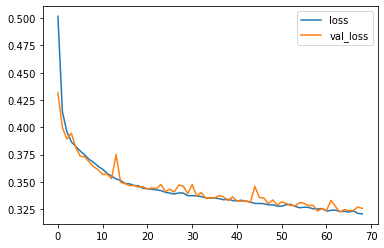

In [26]:
gtr_metrics[['loss', 'val_loss']].plot()

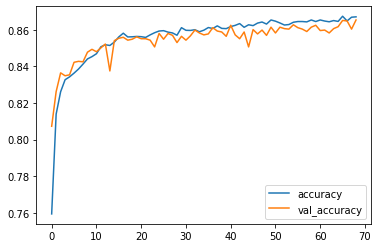

In [27]:
gtr_metrics[['accuracy', 'val_accuracy']].plot()

In [28]:
predictions = (ann.predict(x_test) > 0.5).astype('int32')

119/119 [==============================] - 0s 1ms/step


In [29]:
print(classification_report(y_test_en, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2460
           1       0.90      0.69      0.78      1344

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.84      3804
weighted avg       0.87      0.87      0.86      3804



In [30]:
confusion_matrix(y_test_en, predictions)

array([[2359,  101],
       [ 411,  933]])

In [31]:
accuracy_score(y_test_en, predictions)

0.8654048370136698

In [32]:
f1_score(y_test_en, predictions)

0.7846930193439866

Accuracy 85.88% and f1 76.56%

Hyperparameter Tuning

In [69]:
!apt

apt 1.6.14 (amd64)
Usage: apt [options] command

apt is a commandline package manager and provides commands for
searching and managing as well as querying information about packages.
It provides the same functionality as the specialized APT tools,
like apt-get and apt-cache, but enables options more suitable for
interactive use by default.

Most used commands:
  list - list packages based on package names
  search - search in package descriptions
  show - show package details
  install - install packages
  remove - remove packages
  autoremove - Remove automatically all unused packages
  update - update list of available packages
  upgrade - upgrade the system by installing/upgrading packages
  full-upgrade - upgrade the system by removing/installing/upgrading packages
  edit-sources - edit the source information file

See apt(8) for more information about the available commands.
Configuration options and syntax is detailed in apt.conf(5).
Information about how to configure sources can

In [66]:
from tensorflow.keras.layers import Dense, Dropout

In [63]:
def build_fn(neurons, dropout, optimizer='adam'):

	ann = Sequential()
	ann.add(Dense(neurons, input_shape=(10,), activation='relu'))
	ann.add(Dropout(dropout_rate))
	ann.add(Dense(1, activation='sigmoid'))
 
	ann.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return ann

In [64]:
from tensorflow.keras.optimizers import Adam

In [86]:
#ann = KerasClassifier(build_fn=build_fn, epochs=100, batch_size=10, verbose=0,dropout_rate=0.2,neurons = 15)
optimizer = ['SGD', 'RMSprop', 'Adam']
dropout_rate : [0.2, 0.3, 0.4, 0.5]
neurons : [15 ,20, 25, 30]
       
param_grid = dict(optimizer=optimizer,dropout=dropout,neurons=neurons)

In [89]:
ann = KerasClassifier(ann = create_ann, epochs=100, batch_size=10, verbose=0)

NameError: ignored

In [87]:
grid_result = GridSearchCV(estimator=ann,param_grid=params,n_jobs=-1, cv=3)
grid_result = grid_result.fit(x, y_en)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
144 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py", line 767, in fit
    **kwargs,
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrapp

TypeError: ignored

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))